In [1]:
import pandas as pd
import numpy as np
from tools import *
import os
import preprocessor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

In [2]:
df = pd.read_csv('data/diabetic_data.csv')

In [3]:

preprocessor_eda=preprocessor.Train_preprocessor('data/mapping_json')
df=preprocessor_eda.transform(df)


c:\Users\mario\OneDrive\Documentos\TAAU\TAAU\preprocessor.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diag_1'] = df['diag_1'].map(d).astype(int)
c:\Users\mario\OneDrive\Documentos\TAAU\TAAU\preprocessor.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diag_2'] = df['diag_2'].map(d).astype(int)
c:\Users\mario\OneDrive\Documentos\TAAU\TAAU\preprocessor.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [4]:
df

,race,gender,diag_1,diag_2,diag_3,metformin,insulin,change,diabetesMed,readmitted,sqrt_n_service_uses,medication/day,discharge_disposition_id_home,discharge_disposition_id_hospital,discharge_disposition_id_transfer,admission_type_id_elective,admission_type_id_emergency,admission_type_id_newborn,admission_type_id_traumat,admission_type_id_urgent
2,1,0,10,2,18,-2,-2,0,1,2,1.732051,6.500000,1,0,0,0,1,0,0,0
3,2,1,0,2,6,-2,1,1,1,2,0.000000,8.000000,1,0,0,0,1,0,0,0
4,2,1,1,1,2,-2,0,1,1,2,0.000000,8.000000,1,0,0,0,1,0,0,0
6,2,1,6,6,18,0,0,1,1,2,0.000000,5.250000,1,0,0,1,0,0,0,0
8,2,0,6,6,0,-2,0,1,1,2,0.000000,2.153846,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101334,2,1,6,9,15,-2,0,1,1,0,0.000000,1.800000,1,0,0,0,1,0,0,0
101342,2,0,2,1,1,-2,-2,1,1,0,1.000000,4.800000,1,0,0,0,0,0,0,1
101386,2,1,6,7,6,0,-2,1,1,0,0.000000,4.750000,1,0,0,0,0,0,0,1
101391,2,1,6,6,6,-2,0,0,1,0,2.236068,3.800000,1,0,0,0,1,0,0,0


C:\Users\mario\AppData\Local\Temp\ipykernel_29428\2581847257.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df.corr()


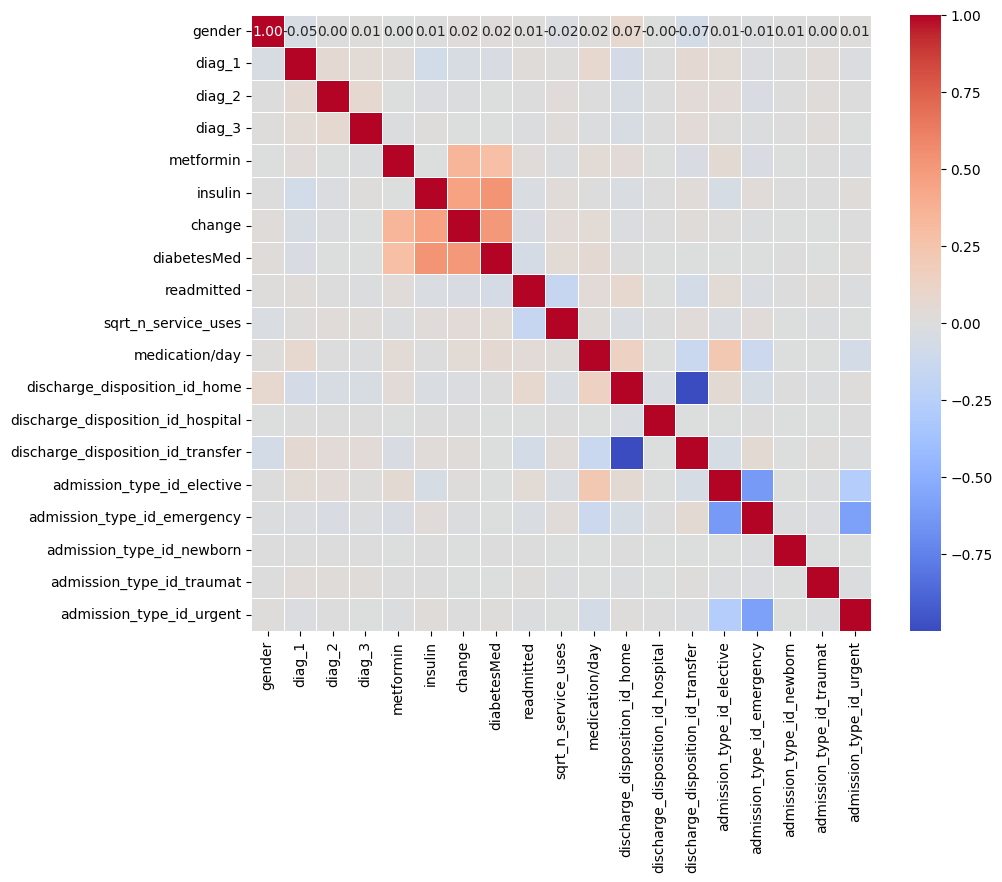

In [5]:
matriz_correlacion = df.corr()

# Ajustando el tamaño de la figura para una mejor visualización
plt.figure(figsize=(10, 8))

# Utilizar Seaborn para una visualización atractiva
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Mostrar el gráfico
plt.show()

<Axes: >

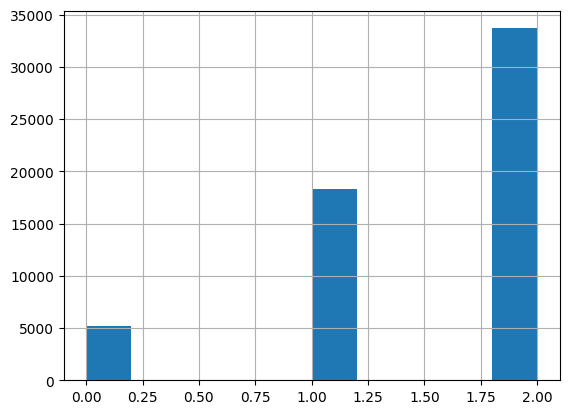

In [6]:
df['readmitted'].hist()

## SPLIT

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57177 entries, 2 to 101667
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   race                               57177 non-null  object 
 1   gender                             57177 non-null  int32  
 2   diag_1                             57177 non-null  int32  
 3   diag_2                             57177 non-null  int32  
 4   diag_3                             57177 non-null  int32  
 5   metformin                          57177 non-null  int64  
 6   insulin                            57177 non-null  int64  
 7   change                             57177 non-null  int64  
 8   diabetesMed                        57177 non-null  int64  
 9   readmitted                         57177 non-null  int32  
 10  sqrt_n_service_uses                57177 non-null  float64
 11  medication/day                     57177 non-null  fl

In [8]:
columns_to_transform=[]
for i in df.columns:
    if df[i].dtype!='int64':
        df[i]=df[i].astype(int)

In [9]:
df.to_csv('data/final_dataframe.csv')

In [11]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split

# Cargar tus datos
# data = tu_dataframe

# Separar las características y la variable objetivo
X = df.drop('readmitted', axis=1)
y = df['readmitted']
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sobremuestreo de la clase minoritaria
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Calcular la nueva distribución de clases después del sobremuestreo
class_distribution = Counter(y_train_resampled)
major_class = max(class_distribution, key=class_distribution.get)
reduced_major_class_count = int(class_distribution[major_class] * 0.75)

# Crear un diccionario para la estrategia de submuestreo
sampling_strategy = {major_class: reduced_major_class_count}

# Submuestreo de la clase mayoritaria
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_balanced, y_train_balanced = rus.fit_resample(X_train_resampled, y_train_resampled)

print(f"Distribución de clases después del submuestreo: {Counter(y_train_balanced)}")


Distribución de clases después del submuestreo: Counter({0: 23550, 1: 23550, 2: 17662})


In [12]:
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
#Ejemplo de smote con cv
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification, load_breast_cancer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
classifiers_list = [
  ( 'Baseline',              DummyClassifier() ),
  ( 'Nearest Neighbors (1)', KNeighborsClassifier(1) ),
  ( 'Nearest Neighbors (3)', KNeighborsClassifier(3) ),
  ( 'Nearest Neighbors (5)', KNeighborsClassifier(5) ),
  ( 'Nearest Neighbors (7)', KNeighborsClassifier(7) ),

  ( 'Decision Tree',         DecisionTreeClassifier() ),
  ( 'Random Forest',         RandomForestClassifier() ),
  ( 'Neural Net',            MLPClassifier() ),
  ( 'AdaBoost',              AdaBoostClassifier() ),
  ( 'Naive Bayes',           GaussianNB() ),
  ( 'Logistic Regression',   LogisticRegression() ),
]






{'Baseline': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]}
Baseline
ROC AREA CV: 0.5
 ROC AREA TEST: 0.5


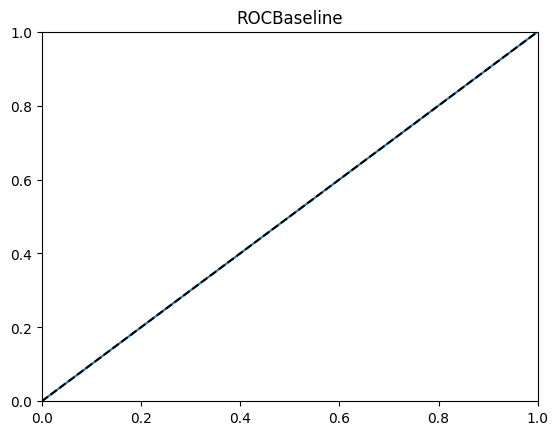

{'Baseline': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'Nearest Neighbors (1)': [0.7983014861995755, 0.7902335456475584, 0.7910828025477707, 0.797452229299363, 0.7919320594479831, 0.7925690021231423, 0.7957537154989384, 0.796284501061571, 0.7980891719745223, 0.7922505307855627]}
Nearest Neighbors (1)
ROC AREA CV: 0.7943949044585988
 ROC AREA TEST: 0.5189943769336592


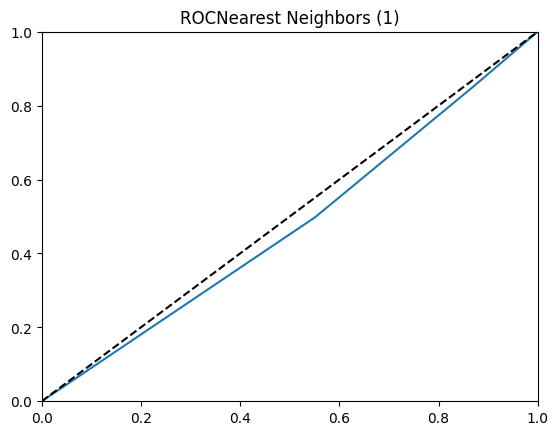

{'Baseline': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'Nearest Neighbors (1)': [0.7983014861995755, 0.7902335456475584, 0.7910828025477707, 0.797452229299363, 0.7919320594479831, 0.7925690021231423, 0.7957537154989384, 0.796284501061571, 0.7980891719745223, 0.7922505307855627], 'Nearest Neighbors (3)': [0.8305782970686213, 0.824659252948433, 0.8234731782372661, 0.8273677093053133, 0.8207401847870021, 0.8272005625650803, 0.827947809467141, 0.8260173577772668, 0.8254590449916831, 0.8271338781679972]}
Nearest Neighbors (3)
ROC AREA CV: 0.8260577275315804
 ROC AREA TEST: 0.5289548937470275


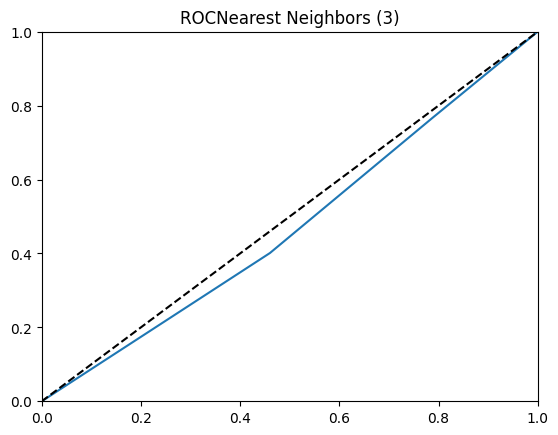

{'Baseline': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'Nearest Neighbors (1)': [0.7983014861995755, 0.7902335456475584, 0.7910828025477707, 0.797452229299363, 0.7919320594479831, 0.7925690021231423, 0.7957537154989384, 0.796284501061571, 0.7980891719745223, 0.7922505307855627], 'Nearest Neighbors (3)': [0.8305782970686213, 0.824659252948433, 0.8234731782372661, 0.8273677093053133, 0.8207401847870021, 0.8272005625650803, 0.827947809467141, 0.8260173577772668, 0.8254590449916831, 0.8271338781679972], 'Nearest Neighbors (5)': [0.8261090901441422, 0.8208265830031419, 0.8200911313358065, 0.8206454622905595, 0.8162120617920042, 0.8238078774137033, 0.8219531556384979, 0.8190135126810043, 0.8190314684841846, 0.8195943491058912]}
Nearest Neighbors (5)
ROC AREA CV: 0.8207284691888936
 ROC AREA TEST: 0.53617134368629


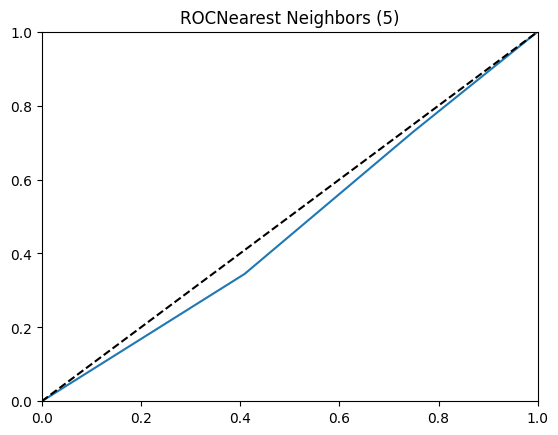

{'Baseline': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'Nearest Neighbors (1)': [0.7983014861995755, 0.7902335456475584, 0.7910828025477707, 0.797452229299363, 0.7919320594479831, 0.7925690021231423, 0.7957537154989384, 0.796284501061571, 0.7980891719745223, 0.7922505307855627], 'Nearest Neighbors (3)': [0.8305782970686213, 0.824659252948433, 0.8234731782372661, 0.8273677093053133, 0.8207401847870021, 0.8272005625650803, 0.827947809467141, 0.8260173577772668, 0.8254590449916831, 0.8271338781679972], 'Nearest Neighbors (5)': [0.8261090901441422, 0.8208265830031419, 0.8200911313358065, 0.8206454622905595, 0.8162120617920042, 0.8238078774137033, 0.8219531556384979, 0.8190135126810043, 0.8190314684841846, 0.8195943491058912], 'Nearest Neighbors (7)': [0.8166434067643044, 0.810890006806677, 0.8077028893066056, 0.8085155734662814, 0.8049378609003744, 0.8095999687463844, 0.8127659600043874, 0.8077701146316506, 0.8082365297668149, 0.8066761479317769]}
Nearest Neighbors (7)
ROC AREA C

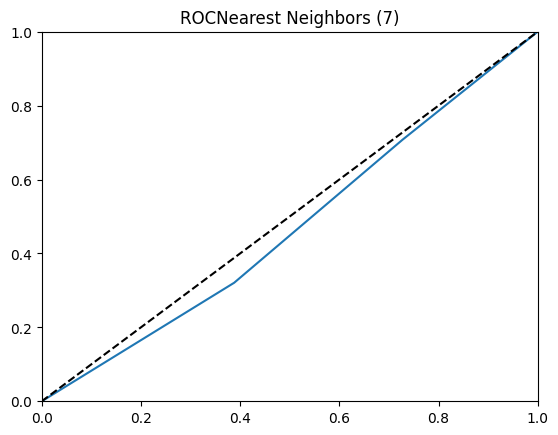

{'Baseline': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'Nearest Neighbors (1)': [0.7983014861995755, 0.7902335456475584, 0.7910828025477707, 0.797452229299363, 0.7919320594479831, 0.7925690021231423, 0.7957537154989384, 0.796284501061571, 0.7980891719745223, 0.7922505307855627], 'Nearest Neighbors (3)': [0.8305782970686213, 0.824659252948433, 0.8234731782372661, 0.8273677093053133, 0.8207401847870021, 0.8272005625650803, 0.827947809467141, 0.8260173577772668, 0.8254590449916831, 0.8271338781679972], 'Nearest Neighbors (5)': [0.8261090901441422, 0.8208265830031419, 0.8200911313358065, 0.8206454622905595, 0.8162120617920042, 0.8238078774137033, 0.8219531556384979, 0.8190135126810043, 0.8190314684841846, 0.8195943491058912], 'Nearest Neighbors (7)': [0.8166434067643044, 0.810890006806677, 0.8077028893066056, 0.8085155734662814, 0.8049378609003744, 0.8095999687463844, 0.8127659600043874, 0.8077701146316506, 0.8082365297668149, 0.8066761479317769], 'Decision Tree': [0.697154733946

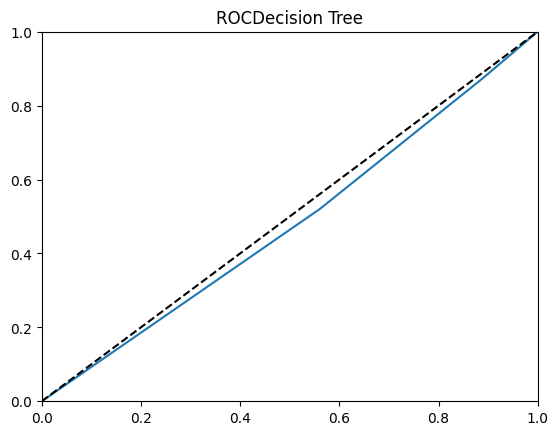

{'Baseline': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'Nearest Neighbors (1)': [0.7983014861995755, 0.7902335456475584, 0.7910828025477707, 0.797452229299363, 0.7919320594479831, 0.7925690021231423, 0.7957537154989384, 0.796284501061571, 0.7980891719745223, 0.7922505307855627], 'Nearest Neighbors (3)': [0.8305782970686213, 0.824659252948433, 0.8234731782372661, 0.8273677093053133, 0.8207401847870021, 0.8272005625650803, 0.827947809467141, 0.8260173577772668, 0.8254590449916831, 0.8271338781679972], 'Nearest Neighbors (5)': [0.8261090901441422, 0.8208265830031419, 0.8200911313358065, 0.8206454622905595, 0.8162120617920042, 0.8238078774137033, 0.8219531556384979, 0.8190135126810043, 0.8190314684841846, 0.8195943491058912], 'Nearest Neighbors (7)': [0.8166434067643044, 0.810890006806677, 0.8077028893066056, 0.8085155734662814, 0.8049378609003744, 0.8095999687463844, 0.8127659600043874, 0.8077701146316506, 0.8082365297668149, 0.8066761479317769], 'Decision Tree': [0.697154733946

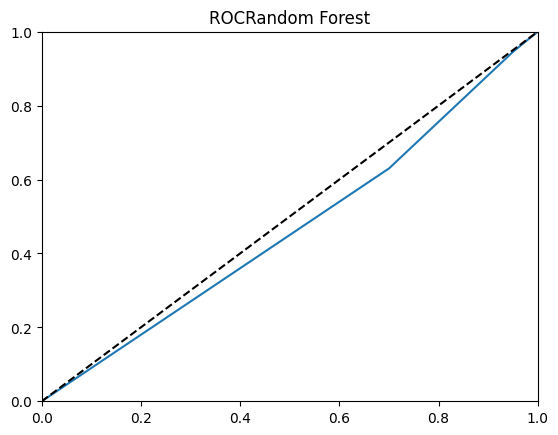

{'Baseline': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'Nearest Neighbors (1)': [0.7983014861995755, 0.7902335456475584, 0.7910828025477707, 0.797452229299363, 0.7919320594479831, 0.7925690021231423, 0.7957537154989384, 0.796284501061571, 0.7980891719745223, 0.7922505307855627], 'Nearest Neighbors (3)': [0.8305782970686213, 0.824659252948433, 0.8234731782372661, 0.8273677093053133, 0.8207401847870021, 0.8272005625650803, 0.827947809467141, 0.8260173577772668, 0.8254590449916831, 0.8271338781679972], 'Nearest Neighbors (5)': [0.8261090901441422, 0.8208265830031419, 0.8200911313358065, 0.8206454622905595, 0.8162120617920042, 0.8238078774137033, 0.8219531556384979, 0.8190135126810043, 0.8190314684841846, 0.8195943491058912], 'Nearest Neighbors (7)': [0.8166434067643044, 0.810890006806677, 0.8077028893066056, 0.8085155734662814, 0.8049378609003744, 0.8095999687463844, 0.8127659600043874, 0.8077701146316506, 0.8082365297668149, 0.8066761479317769], 'Decision Tree': [0.697154733946

c:\Users\mario\.conda\envs\TIA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


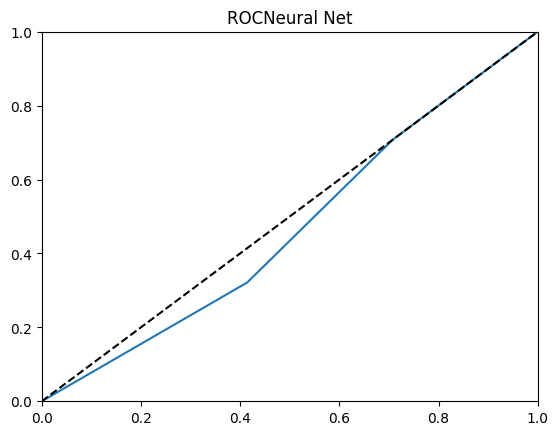

{'Baseline': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'Nearest Neighbors (1)': [0.7983014861995755, 0.7902335456475584, 0.7910828025477707, 0.797452229299363, 0.7919320594479831, 0.7925690021231423, 0.7957537154989384, 0.796284501061571, 0.7980891719745223, 0.7922505307855627], 'Nearest Neighbors (3)': [0.8305782970686213, 0.824659252948433, 0.8234731782372661, 0.8273677093053133, 0.8207401847870021, 0.8272005625650803, 0.827947809467141, 0.8260173577772668, 0.8254590449916831, 0.8271338781679972], 'Nearest Neighbors (5)': [0.8261090901441422, 0.8208265830031419, 0.8200911313358065, 0.8206454622905595, 0.8162120617920042, 0.8238078774137033, 0.8219531556384979, 0.8190135126810043, 0.8190314684841846, 0.8195943491058912], 'Nearest Neighbors (7)': [0.8166434067643044, 0.810890006806677, 0.8077028893066056, 0.8085155734662814, 0.8049378609003744, 0.8095999687463844, 0.8127659600043874, 0.8077701146316506, 0.8082365297668149, 0.8066761479317769], 'Decision Tree': [0.697154733946

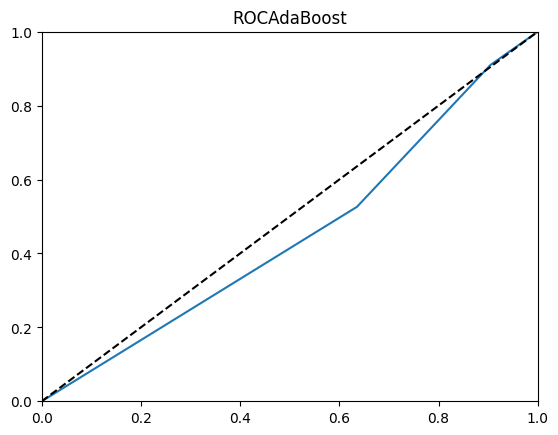

{'Baseline': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'Nearest Neighbors (1)': [0.7983014861995755, 0.7902335456475584, 0.7910828025477707, 0.797452229299363, 0.7919320594479831, 0.7925690021231423, 0.7957537154989384, 0.796284501061571, 0.7980891719745223, 0.7922505307855627], 'Nearest Neighbors (3)': [0.8305782970686213, 0.824659252948433, 0.8234731782372661, 0.8273677093053133, 0.8207401847870021, 0.8272005625650803, 0.827947809467141, 0.8260173577772668, 0.8254590449916831, 0.8271338781679972], 'Nearest Neighbors (5)': [0.8261090901441422, 0.8208265830031419, 0.8200911313358065, 0.8206454622905595, 0.8162120617920042, 0.8238078774137033, 0.8219531556384979, 0.8190135126810043, 0.8190314684841846, 0.8195943491058912], 'Nearest Neighbors (7)': [0.8166434067643044, 0.810890006806677, 0.8077028893066056, 0.8085155734662814, 0.8049378609003744, 0.8095999687463844, 0.8127659600043874, 0.8077701146316506, 0.8082365297668149, 0.8066761479317769], 'Decision Tree': [0.697154733946

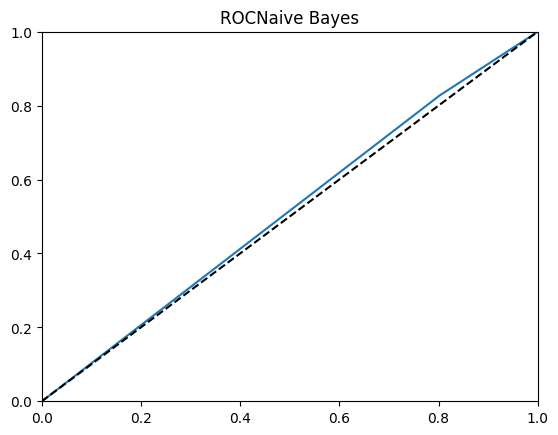

{'Baseline': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'Nearest Neighbors (1)': [0.7983014861995755, 0.7902335456475584, 0.7910828025477707, 0.797452229299363, 0.7919320594479831, 0.7925690021231423, 0.7957537154989384, 0.796284501061571, 0.7980891719745223, 0.7922505307855627], 'Nearest Neighbors (3)': [0.8305782970686213, 0.824659252948433, 0.8234731782372661, 0.8273677093053133, 0.8207401847870021, 0.8272005625650803, 0.827947809467141, 0.8260173577772668, 0.8254590449916831, 0.8271338781679972], 'Nearest Neighbors (5)': [0.8261090901441422, 0.8208265830031419, 0.8200911313358065, 0.8206454622905595, 0.8162120617920042, 0.8238078774137033, 0.8219531556384979, 0.8190135126810043, 0.8190314684841846, 0.8195943491058912], 'Nearest Neighbors (7)': [0.8166434067643044, 0.810890006806677, 0.8077028893066056, 0.8085155734662814, 0.8049378609003744, 0.8095999687463844, 0.8127659600043874, 0.8077701146316506, 0.8082365297668149, 0.8066761479317769], 'Decision Tree': [0.697154733946

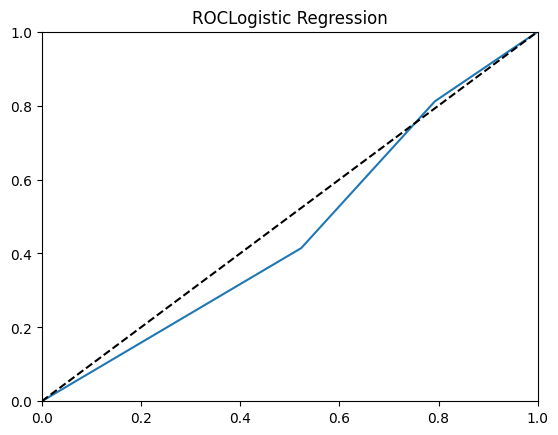

In [13]:
valores_auc={}
smote = SMOTE(random_state = 11)
X_train, y_train = smote.fit_resample(X_train, y_train)
for name, model in classifiers_list:
  stratified_kfold = StratifiedKFold(n_splits=10,
                                        shuffle=True,
                                        random_state=11)

  param_grid = {}
  grid_search = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='roc_auc_ovr',
                            cv=stratified_kfold,
                            n_jobs=-1)

  grid_search.fit(X_train, y_train)
  valores_auc[name]=[grid_search.cv_results_['split0_test_score'][0],grid_search.cv_results_['split1_test_score'][0],grid_search.cv_results_['split2_test_score'][0],grid_search.cv_results_['split3_test_score'][0],grid_search.cv_results_['split4_test_score'][0],grid_search.cv_results_['split5_test_score'][0],grid_search.cv_results_['split6_test_score'][0],grid_search.cv_results_['split7_test_score'][0],grid_search.cv_results_['split8_test_score'][0],grid_search.cv_results_['split9_test_score'][0]]
  print(valores_auc)
  cv_score = grid_search.best_score_
  test_score = grid_search.score(X_test, y_test)
  print(f'{name}\nROC AREA CV: {cv_score}\n ROC AREA TEST: {test_score}')
  y_pred=grid_search.predict(X_test)
  roc = roc_curve(y_test, y_pred, pos_label=1)
  sns.lineplot(x=roc[0], y=roc[1])
  sns.lineplot(x=[0,1], y=[0,1], linestyle='--', color='black')
  plt.xlim([0,1])
  plt.ylim([0,1])
  plt.title("ROC"+name)
  plt.show()